# Examples of using MyTools.ipynb \- adding labels to receptor models



In [3]:
%run MyTools.ipynb

## Make and plot a graph. The vertices are integers.  The edge labels are 'None'



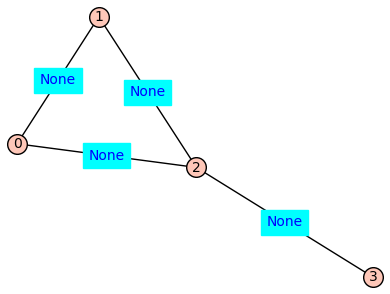

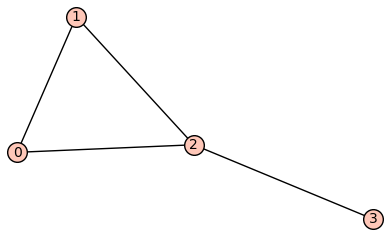

In [4]:
G=graphs.CycleGraph(3); G.add_edge(2,3); G.show(edge_labels=True); G.show(edge_labels=False)

vertices: [a0, a1, a2, a3]
edges: [(a0, a1, None), (a0, a2, None), (a1, a2, None), (a2, a3, None)]


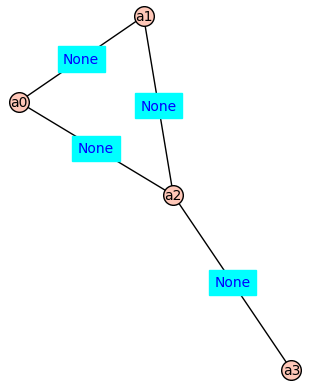

In [5]:
H=add_vertex_monomials(G)
my_graph_show(H)

## The function `add_edge_monomials(G)`defines variables from a polynomial ring and applies them edge labels to the graph.  The default method is used below.



vertices: [0, 1, 2, 3]
edges: [(0, 1, e01), (0, 2, e02), (1, 2, e12), (2, 3, e23)]


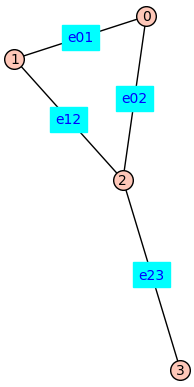

In [6]:
G=add_edge_monomials(G)
my_graph_show(G)

## The function `add_edge_monomials()`also works when vertices are variables from a polynomial ring.



vertices: [a0, a1, a2, a3]
edges: [(a0, a1, e_a0a1), (a0, a2, e_a0a2), (a1, a2, e_a1a2), (a2, a3, e_a2a3)]


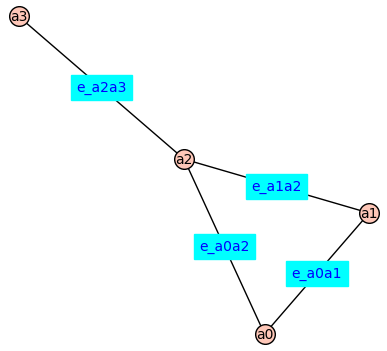

In [7]:
H=add_edge_monomials(H)
my_graph_show(H)

## Using `method='alpha'` in `add_edge_monomials()` creates simpler edge labels



vertices: [0, 1, 2, 3]
edges: [(0, 1, b), (0, 2, c), (0, 3, d), (1, 2, e), (2, 3, f)]


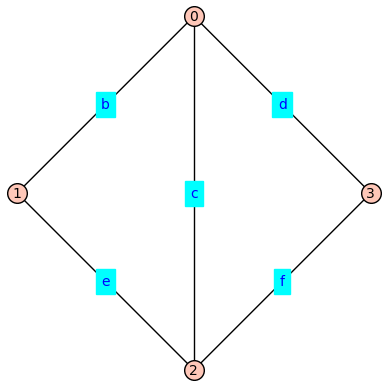

In [8]:
G=graphs.CycleGraph(4); G.add_edge(0,2)
G = add_edge_monomials(G,method='alpha')
my_graph_show(G)

## Using `ring=True` in `add_vertex_monomials()` constructs a polynomial ring over the variables that label the vertices



In [9]:
(G,V) = add_vertex_monomials(graphs.HouseGraph(),ring=True)
show(V)

Defining a0, a1, a2, a3, a4


Multivariate Polynomial Ring in a0, a1, a2, a3, a4 over Integer Ring

In [10]:
fv = (a0+a1)*(a0+a3+a4)^2
print(fv)

a1*a4^2 + a0*a4^2 + 2*a1*a3*a4 + 2*a0*a3*a4 + 2*a0*a1*a4 + 2*a0^2*a4 + a1*a3^2 + a0*a3^2 + 2*a0*a1*a3 + 2*a0^2*a3 + a0^2*a1 + a0^3


## Using `ring=True` in `add_edge_monomials()` constructs a polynomial ring over the variables that label the edges



In [11]:
(G,E) = add_edge_monomials(graphs.HouseGraph(),method='alpha',ring=True)
show(E)

Defining b, c, d, e, f, g


Multivariate Polynomial Ring in b, c, d, e, f, g over Integer Ring

In [12]:
fe = (b+c)*(b+e+f)^2
print(fe)

c*f^2 + b*f^2 + 2*c*e*f + 2*b*e*f + 2*b*c*f + 2*b^2*f + c*e^2 + b*e^2 + 2*b*c*e + 2*b^2*e + b^2*c + b^3


## Below we create a spanning tree labelled according to a breadth\-first traversal



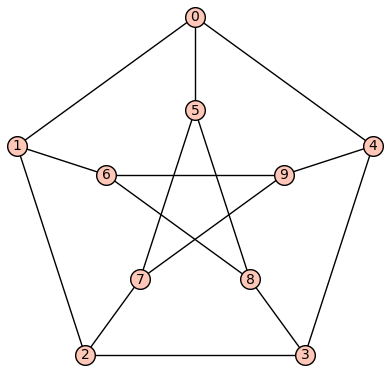

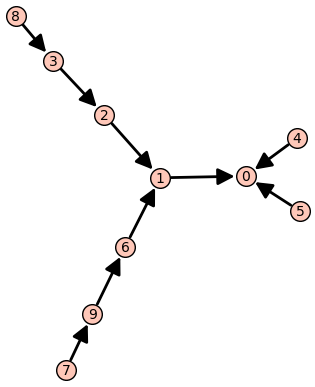

[0, 1, 4, 5, 2, 6, 3, 9, 7, 8]

In [13]:
P = graphs.PetersenGraph()
P.show(edge_labels=False)
(BFSVertexList,BFSTree) = P.lex_BFS(tree=True,initial_vertex=0)
BFSTree.show(edge_labels=False)
show(BFSVertexList)


In [14]:
d = dict((v,i) for i, v in enumerate(BFSVertexList))
print(d)

{0: 0, 1: 1, 4: 2, 5: 3, 2: 4, 6: 5, 3: 6, 9: 7, 7: 8, 8: 9}


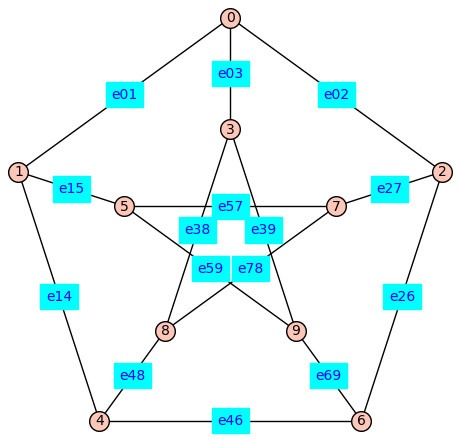

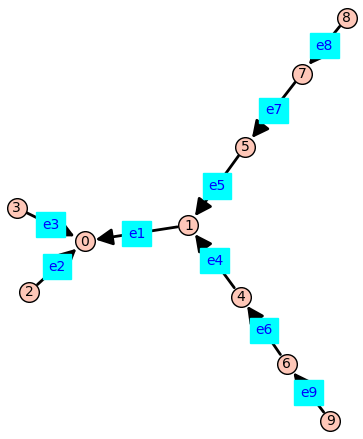

In [15]:
P2 = P.copy()
P2.relabel(d)
P2 = add_edge_monomials(P2)
P2.show(figsize=6,edge_labels=True)

T2=BFSTree.copy()
T2.relabel(d)
T2 = add_edge_monomials(T2,short_name=True)
T2.show(figsize=6,edge_labels=True)